In [607]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import re
from datetime import datetime

In [647]:
train = pd.read_csv("train.csv")
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
6549,2019-05-24,9150.299805,9211.099609,9141.400391,9174.599609,9174.599609,121673100.0,0
6550,2019-05-27,9225.900391,9294.599609,9204.700195,9216.400391,9216.400391,60178000.0,0
6551,2019-05-28,9220.400391,9224.900391,9132.900391,9191.799805,9191.799805,218900800.0,0
6552,2019-05-29,9113.200195,9116.700195,9035.099609,9080.500000,9080.500000,148987100.0,0
6553,2019-05-30,9120.799805,9175.200195,9114.099609,9157.799805,9157.799805,101389200.0,0


In [649]:
train.shape

(6554, 8)

In [609]:
test = pd.read_csv("test_x.csv")
test.tail()

,test_index,Date,Open,High,Low,Close,Adj Close,Volume
721,7278,2022-03-25,8314.099609,8363.200195,8286.500000,8330.599609,8330.599609,156189000.0
722,7279,2022-03-28,8354.400391,8485.700195,8354.400391,8365.599609,8365.599609,167961800.0
723,7280,2022-03-29,8451.000000,8621.000000,8419.700195,8614.599609,8614.599609,257812200.0
724,7281,2022-03-30,8583.299805,8597.400391,8508.900391,8550.599609,8550.599609,185389000.0
725,7282,2022-03-31,8562.599609,8588.299805,8445.099609,8445.099609,8445.099609,220117500.0


In [610]:
tweets = pd.read_csv("tweets_from2015_#Ibex35.csv")
tweets.tail()

,tweetDate,handle,text
9796,Thu Jan 08 16:41:36 +0000 2015,elEconomistaes,"#Cierre | El #Ibex35 sube un 2,26% hasta los 10.115 puntos http://t.co/MFpBhvutv3"
9797,Sat Jan 03 17:20:30 +0000 2015,Roger_bolsa,Un vistazo a los #Bluechips del #Ibex #Ibex35. Análisis del #BancoSantander #Inditex #Iberdrola y #Telefonica . http://t.co/GgYb65iAHX
9798,Sat Jan 10 19:42:45 +0000 2015,Secretosdebolsa,"Así comienza la #Bolsa en #2015 Ojo a los soportes en #Europa y especialmente #España con un #Ibex35 en -5,48% http://t.co/qUBAIgV3vX"
9799,Sat Jan 10 21:47:17 +0000 2015,Roger_bolsa,"Análisis del #BancoSantander #Santander #SAN tras el desplome del viernes.¿A tapar el gap de los 5,70€? #Ibex #Ibex35 http://t.co/h7MLbkcu6l"
9800,Mon Jan 05 15:06:49 +0000 2015,elEconomistaes,"El #Ibex35 profundiza en su caída (-2,8%) y pierde los 10.100 puntos http://t.co/FuFwNsu0i0"


In [611]:
tweets["text"]

0       He hecho el repaso de todos los componentes del #IBEX35 y ahora me pongo con lo de La Chiqui. Si mañana tengo tiempo, publicaré algún activo interesante del mercado europeo y americano. Buen fin de semana.                                                                          
1       Els projectes que han presentat les empreses del #Ibex35 als fons #NextGenerationEU: \nEndesa 110 projectes, 19.000 M €\nIberdrola 150 projectes, 21.000 M\nNaturgy 13.000 M\nACS 4.500 M\n...i així fins a sumar 100.000 M € per als grups oligàrquics de sempre.                     
2       Por si no lo has visto, o no lo encuentras en búsquedas que suele pasar 🤔\n#Analisis y niveles del #Ibex35 y varias #Acciones en #Youtube \n#Ezentis #AedasHomes #LLeidanet #Merlinpropertis #BBVA y otras muchas en el canal 🧐\n🙏Espero que guste y/o ayude 🔄\nhttps://t.co/6yqA0TbRJY
3       📈 #BOLSA: El #Ibex35 abre en 🟢 \n\n🇪🇸 #Ibex35 🔼  +0,10% (8.527,8 puntos)\n\nMayores subidas\n#Aena 🔼+1,40%\n#SiemensGamesa 🔼+1,0

In [612]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume,Target
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6554.000000
mean,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.516936
std,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499751
min,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000
max,15999.200195,16040.400391,15868.599609,15945.700195,15945.683594,7.894902e+08,1.000000


In [650]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6554 non-null   object 
 1   Open       6421 non-null   float64
 2   High       6421 non-null   float64
 3   Low        6421 non-null   float64
 4   Close      6421 non-null   float64
 5   Adj Close  6421 non-null   float64
 6   Volume     6421 non-null   float64
 7   Target     6554 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 409.8+ KB


In [614]:
test.describe()

,test_index,Open,High,Low,Close,Adj Close,Volume
count,726.000000,726.000000,726.000000,726.000000,726.000000,726.000000,7.260000e+02
mean,6919.500000,8399.936418,8458.035202,8332.158471,8396.085609,8396.085609,2.086387e+08
std,209.722436,899.325142,886.671165,916.904022,903.320144,903.320144,1.015796e+08
min,6557.000000,6223.700195,6362.500000,5814.500000,6107.200195,6107.200195,3.543620e+07
25%,6738.250000,7848.675049,7963.874878,7762.924805,7857.675171,7857.675171,1.472686e+08
50%,6919.500000,8673.950195,8725.250000,8609.750000,8672.399902,8672.399902,1.827458e+08
75%,7100.750000,9077.599609,9124.224854,9001.125244,9077.375244,9077.375244,2.340954e+08
max,7282.000000,10048.700195,10100.200195,10020.700195,10083.599609,10083.599609,9.752120e+08


In [615]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   test_index  726 non-null    int64  
 1   Date        726 non-null    object 
 2   Open        726 non-null    float64
 3   High        726 non-null    float64
 4   Low         726 non-null    float64
 5   Close       726 non-null    float64
 6   Adj Close   726 non-null    float64
 7   Volume      726 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.5+ KB


In [616]:
tweets.describe()

,tweetDate,handle,text
count,9799,9798,9797
unique,9780,2114,9763
top,Wed Jun 10 17:21:23 +0000 2020,Bolsacarlosmari,OJO HOY #VENCIMIENTOS \n\nHORARIO de #VENCIMIENTOS por la MAÑANA \n\n12:00 Opciones sobre #EuroStoxx50\n\n13:00 Opciones sobre #Dax\n\nHORARIO de #VENCIMIENTOS por la TARDE \n\n15:30 Opciones #EEUU\n\n16:00 Futuros y opciones sobre #CAC40 y #AEX\n\n16:45 Futuros y opciones sobre #ibex35
freq,2,380,5


In [617]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetDate  9799 non-null   object
 1   handle     9798 non-null   object
 2   text       9797 non-null   object
dtypes: object(3)
memory usage: 229.8+ KB


##### Handling NANs

Test 1 pad

In [618]:
train_1 = train.copy()
train_1.fillna(method='ffill', inplace=True)
train_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [619]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6554 non-null   object 
 1   Open       6554 non-null   float64
 2   High       6554 non-null   float64
 3   Low        6554 non-null   float64
 4   Close      6554 non-null   float64
 5   Adj Close  6554 non-null   float64
 6   Volume     6554 non-null   float64
 7   Target     6554 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 409.8+ KB


Test 2 Interpolate

In [705]:
train_2 = train.copy()
train_2 = train_2.interpolate() # method="time"

In [706]:
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6554 non-null   object 
 1   Open       6554 non-null   float64
 2   High       6554 non-null   float64
 3   Low        6554 non-null   float64
 4   Close      6554 non-null   float64
 5   Adj Close  6554 non-null   float64
 6   Volume     6554 non-null   float64
 7   Target     6554 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 409.8+ KB


In [707]:
train_2.drop("Date", axis=1, inplace=True)
train_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6554 non-null   float64
 1   High       6554 non-null   float64
 2   Low        6554 non-null   float64
 3   Close      6554 non-null   float64
 4   Adj Close  6554 non-null   float64
 5   Volume     6554 non-null   float64
 6   Target     6554 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 358.5 KB


In [674]:
train_2.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

Tweets fillna

In [622]:
tweets.isna().sum()

tweetDate    2
handle       3
text         4
dtype: int64

In [623]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetDate  9799 non-null   object
 1   handle     9798 non-null   object
 2   text       9797 non-null   object
dtypes: object(3)
memory usage: 229.8+ KB


In [624]:
tweets_1 = tweets.copy()
tweets_1.dropna(inplace=True)
tweets_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9797 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetDate  9797 non-null   object
 1   handle     9797 non-null   object
 2   text       9797 non-null   object
dtypes: object(3)
memory usage: 306.2+ KB


##### Tweet info extraction

Ignore handle since it brings no information

In [625]:
# 1994-03-03 Format

net = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct",
       "Nov", "Dec", "JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT",
       "NOV", "DEC"]

num = ["01-", "02-", "03-", "04-", "05-", "06-", "07-", "08-", "09-", "10-", 
          "11-", "12-", "01-", "02-", "03-", "04-", "05-", "06-", "07-", "08-",
              "09-", "10-", "11-", "12-"]

week_days = ["Mon ", "Tue ", "Wed ", "Thu ", "Fri ", "Sat ", "Sun "]

In [626]:
def clean(i):
    c = []
    for element in i:
        for i in range(len(net)):
            element = re.sub(net[i], num[i], str(element), re.I)
        for i in range(len(week_days)):
            element = re.sub(week_days[i], "", str(element), re.I)    
        element = re.sub("\+\d{4}", "", str(element))
        element = re.sub(" \d{2}:\d{2}:\d{2}", "-", str(element))
        element = re.sub(" ", "", str(element))
        element = re.sub("[^0-9\\-]", "", str(element))
        if "-20" in element or "-19" in element: 
            element = datetime.strptime(str(element), '%m-%d-%Y')
            
        else:
            element = ""
            
        element = re.sub(" \d{2}:\d{2}:\d{2}", "", str(element))
        c.append(str(element))
    return c

In [627]:
# format: month-day-year
lst = clean(tweets_1.loc[:,"tweetDate"])
tweets_1['Date'] = lst
tweets_2 = tweets_1.drop(["tweetDate", "handle"], axis = 1)
tweets_2

,text,Date
0,"He hecho el repaso de todos los componentes del #IBEX35 y ahora me pongo con lo de La Chiqui. Si mañana tengo tiempo, publicaré algún activo interesante del mercado europeo y americano. Buen fin de semana.",2022-04-09
1,"Els projectes que han presentat les empreses del #Ibex35 als fons #NextGenerationEU: \nEndesa 110 projectes, 19.000 M €\nIberdrola 150 projectes, 21.000 M\nNaturgy 13.000 M\nACS 4.500 M\n...i així fins a sumar 100.000 M € per als grups oligàrquics de sempre.",2022-04-07
2,"Por si no lo has visto, o no lo encuentras en búsquedas que suele pasar 🤔\n#Analisis y niveles del #Ibex35 y varias #Acciones en #Youtube \n#Ezentis #AedasHomes #LLeidanet #Merlinpropertis #BBVA y otras muchas en el canal 🧐\n🙏Espero que guste y/o ayude 🔄\nhttps://t.co/6yqA0TbRJY",2022-04-04
3,"📈 #BOLSA: El #Ibex35 abre en 🟢 \n\n🇪🇸 #Ibex35 🔼 +0,10% (8.527,8 puntos)\n\nMayores subidas\n#Aena 🔼+1,40%\n#SiemensGamesa 🔼+1,07%\n#Cellnex 🔼+0,86% https://t.co/LxHqCPzPtP",2022-04-05
4,"El #Ibex35 retrocede un 0,4% en marzo y un 3,08% en el primer trimestre de 2022\nhttps://t.co/wSm71JLkOr https://t.co/fttYtU1p0k",2022-03-31
...,...,...
9796,"#Cierre | El #Ibex35 sube un 2,26% hasta los 10.115 puntos http://t.co/MFpBhvutv3",2015-01-08
9797,Un vistazo a los #Bluechips del #Ibex #Ibex35. Análisis del #BancoSantander #Inditex #Iberdrola y #Telefonica . http://t.co/GgYb65iAHX,2015-01-03
9798,"Así comienza la #Bolsa en #2015 Ojo a los soportes en #Europa y especialmente #España con un #Ibex35 en -5,48% http://t.co/qUBAIgV3vX",2015-01-10
9799,"Análisis del #BancoSantander #Santander #SAN tras el desplome del viernes.¿A tapar el gap de los 5,70€? #Ibex #Ibex35 http://t.co/h7MLbkcu6l",2015-01-10


Dealing with the text

In [628]:
pd.set_option("display.max_colwidth", -1)

C:\Users\Vladi\AppData\Local\Temp/ipykernel_1176/2475433900.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [629]:
# pd.set_option('display.max_rows', tweets.shape[0])

In [630]:
tweets_2.loc[:,["text"]].tail(100)

,text
9701,#Apertura | El #Ibex35 arranca con subidas alrededor de los 11.150 puntos http://t.co/WEV2taYVHo
9702,"#SABADELL ( #SAB )Mercado:España, #Ibex35 ,Momento crucial d cruces M5-M30,directriz bajista,alcista.ATLAS encendido. http://t.co/00AUqxTJUG"
9703,Le ha cogido el gusto. @mariadelamiel gráfico sencillo sobre el #Ibex35 ¿Qué pasa cuando se pierde una directriz? http://t.co/8VYvlFbhns
9704,"Veamos el gráfico mensual del #Ibex #Ibex35 (sin tener en cuenta todavía, el posible gap alcista del próximo lunes). http://t.co/dY8Hg76uis"
9705,"#Apertura | El #Ibex35 inicia la sesión con una subida del 1%, sobre los 11.000 puntos http://t.co/7wijU6IJvP"
9706,¡Definiendo la imagen corporativa de @learnbrokers! #bolsa #cursos #ibex35 #invertir https://t.co/vCpm3Deb4M http://t.co/rNuAXGIUvL
9707,#Ibex35 rompe cuña y no debe perder 11.000 pts Soportes 10.900 (38%fibo y gap) 10.785 50%fibo 10700 gap y 61%fibo http://t.co/ySNlzjBoLk
9708,Análisis de #Almirall #ALM .La farmacéutica sigue siendo alcista mientras no se demuestre lo contrario. #Ibex #Ibex35 http://t.co/Ja5eJAIDeo
9709,"El #ibex35 cierra la sesión con una subida del 0,3%, hasta 11.178 puntos. Sube un 7,4% en febrero."
9710,#Monedero gana tanto como el Ejecutivo del #Ibex35 al que critica Iglesias http://t.co/T8QrjRmw4N


In [681]:
def desc(i):
    c = []
    for row in i.iterrows():   
        row = str(row) 
        if "bex" in row or "BEX" in row: 
            element = ""
            if "caída" or "caida" or "se hunde" or "cae" in row:
                element = re.sub ("caída|caida|se hunde el |cae un ", "-", row)
                element = re.findall("[\d,]+%", str(element))
            
            else:
                element = ""
        else:
            element = ""   
            
        if len(element) > 1:
            element = element[0]
            
        element = re.sub("[\([{})\]']","", str(element)) 
        c.append(element)

    return c

def growth(i):
    c = []
    for row in i.iterrows():   
        row = str(row) 
        if "bex" in row or "BEX" in row: 
            element = ""
            if "sube" or "subida" in row:
                element = re.findall("[\d\,]+%", row)
                
            else:
                element = ""


In [682]:
r = desc(tweets_2.loc[:,["text"]].tail(100))
for index, value in enumerate(r):
    print(index, value)

0 
1 
2 
3 
4 1%
5 
6 38%
7 
8 0,3%
9 
10 
11 
12 
13 0,10%
14 
15 
16 
17 0,2%
18 
19 
20 
21 
22 
23 
24 
25 
26 
27 
28 0,3%
29 
30 
31 
32 
33 0,5%
34 
35 
36 16%
37 
38 
39 
40 
41 
42 
43 
44 1,2%
45 
46 
47 
48 2,62%
49 
50 
51 
52 
53 
54 
55 
56 0,1%
57 
58 
59 
60 
61 
62 
63 
64 
65 
66 0,5%
67 0,37%
68 
69 1,7%
70 0,41%
71 
72 
73 
74 1,24%
75 
76 0,5%
77 0,5%
78 
79 1,7%
80 
81 
82 
83 
84 1,5%
85 2,26%
86 
87 
88 
89 3,9%
90 
91 3,45%
92 
93 
94 
95 2,26%
96 
97 5,48%
98 
99 2,8%


##### Algorithm Building, deep learning test

<AxesSubplot:>

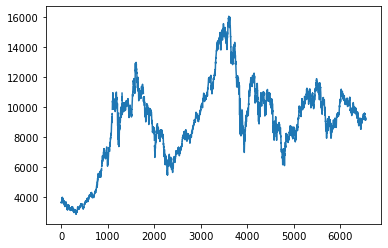

In [633]:
train_2["High"].plot()

In [634]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [635]:
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Candlestick(x=train_2.index,
                open=train_2["Open"], high=train_2["High"],
                low=train_2["Low"], close=train_2["Close"]),
              secondary_y=True)

fig.add_trace(go.Bar(x=train_2.index, y=train_2["Volume"]),
               secondary_y=False)

fig.update_layout(
    title=f"Ibex 35 growth",
    yaxis_title="Change",
)

fig.layout.yaxis2.showgrid=True
fig.show()

In [699]:
# Choosing the test rate
train_2.shape

(6554, 7)

In [684]:
test_days = int(train_2.shape[0]*0.15) 
test_days

983

In [708]:
test_2 = train_2.iloc[train_2.shape[0]-test_days:]

In [709]:
train_3 = train_2.iloc[:train_2.shape[0]-test_days]

train_3.drop("Date", axis=1, inplace=True)
train_3

In [710]:
train_3.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

In [712]:
test_2.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

train_3 = train_3.dropna(axis=0)

In [645]:
train_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5439 entries, 0 to 5570
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5439 non-null   float64
 1   High       5439 non-null   float64
 2   Low        5439 non-null   float64
 3   Close      5439 non-null   float64
 4   Adj Close  5439 non-null   float64
 5   Volume     5439 non-null   float64
 6   Target     5439 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 339.9 KB


In [713]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [716]:
scaler.fit(train_3)

MinMaxScaler()

In [717]:
scaled_train = scaler.transform(train_3)
scaled_test = scaler.transform(test_2)

In [718]:
scaled_train

array([[0.05711087, 0.05905903, 0.05733793, ..., 0.06034891, 0.        ,
        0.        ],
       [0.06010308, 0.06063921, 0.06072114, ..., 0.05849885, 0.        ,
        1.        ],
       [0.05787224, 0.05681791, 0.05752204, ..., 0.05780315, 0.        ,
        1.        ],
       ...,
       [0.66140046, 0.65913799, 0.65944002, ..., 0.65568861, 0.29048454,
        0.        ],
       [0.65100009, 0.65205001, 0.64958194, ..., 0.6455514 , 0.42978849,
        0.        ],
       [0.63861247, 0.63715234, 0.63698507, ..., 0.63302143, 0.42402528,
        1.        ]])

In [719]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [737]:
length = 15
batch_size = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size=batch_size)

In [738]:
len(generator)

5556

In [739]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN

In [740]:
scaled_train.shape

(5571, 7)

In [741]:
model = Sequential()
model.add(GRU(450, input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))

In [742]:
model.compile(optimizer='rmsprop', loss='mse')

In [743]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 450)               619650    
                                                                 
 dense (Dense)               (None, 7)                 3157      
                                                                 
Total params: 622,807
Trainable params: 622,807
Non-trainable params: 0
_________________________________________________________________


In [744]:
from tensorflow.keras.callbacks import EarlyStopping
import os, datetime
early_stop = EarlyStopping(monitor = 'val_loss', patience = 0)
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
val_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size=batch_size)

In [745]:
model.fit(generator, epochs = 10, callbacks = [early_stop, tensorboard_callback], validation_data=val_generator)

Epoch 1/10
5556/5556 [==============================] - 41s 7ms/step - loss: 0.0314 - val_loss: 0.0286
Epoch 2/10
5556/5556 [==============================] - 35s 6ms/step - loss: 0.0300 - val_loss: 0.0327


In [748]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [749]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [750]:
from tensorflow.python.client import device_lib

In [752]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 381999211415094544
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6940786688
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11377658140887616144
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [756]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))
model.predict(first_eval_batch)

array([[0.63345087, 0.63200796, 0.63407975, 0.6351096 , 0.6381885 ,
        0.33512962, 0.99357444]], dtype=float32)

In [757]:
scaled_test[0]

array([0.63303918, 0.63941623, 0.63939393, 0.64120149, 0.64120149,
       0.28429397, 0.        ])

In [758]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    current_pred = model.predict(current_batch)[0]

    test_predictions.append(current_pred) 

    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [759]:
# Invertir el escalador y comparar con los valores reales
true_predictions = scaler.inverse_transform(test_predictions)

In [760]:
true_predictions

array([[ 1.11849072e+04,  1.11964842e+04,  1.10988294e+04, ...,
         1.12129768e+04,  2.64581550e+08,  9.93574440e-01],
       [ 1.13766248e+04,  1.13634825e+04,  1.12944762e+04, ...,
         1.14277803e+04,  2.45455682e+08,  1.00754583e+00],
       [ 1.15117571e+04,  1.15555387e+04,  1.14711989e+04, ...,
         1.16504928e+04,  2.29641988e+08,  1.00185716e+00],
       ...,
       [ 2.32705897e+04,  2.34158251e+04,  2.34188990e+04, ...,
         2.35436093e+04, -6.22806963e+07,  1.00868225e+00],
       [ 2.32705897e+04,  2.34158251e+04,  2.34188990e+04, ...,
         2.35436093e+04, -6.22806963e+07,  1.00868225e+00],
       [ 2.32705897e+04,  2.34158251e+04,  2.34188990e+04, ...,
         2.35436093e+04, -6.22806963e+07,  1.00868225e+00]])

<AxesSubplot:>

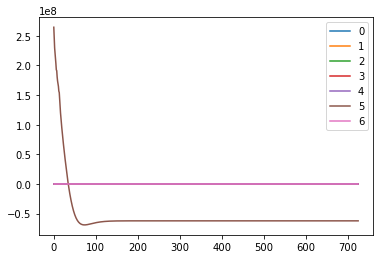

In [761]:
predictions_72 = pd.DataFrame(true_predictions)
predictions_72.plot()

<AxesSubplot:>

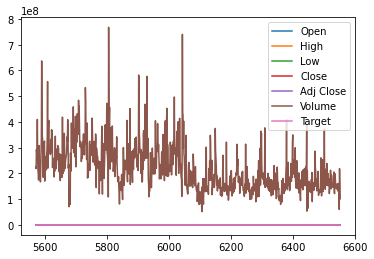

In [762]:
test_2.plot()

In [765]:
# Ahora hay que preprocesar todo el data frame 
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(train_2)
full_generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [780]:
model = Sequential()
model.add(GRU(440, input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile('adam', loss = 'binary_crossentropy')

In [781]:
model.fit(full_generator, epochs = 2)

Epoch 1/2
6539/6539 [==============================] - 37s 5ms/step - loss: 1.2484
Epoch 2/2
6539/6539 [==============================] - 36s 5ms/step - loss: 0.7618


In [782]:
forecast = []
# forecast 3 days into the future
n_features = scaled_train.shape[1]
periods = 3
first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [783]:
forecast = scaler.inverse_transform(forecast)

In [784]:
days_3 = pd.DataFrame(forecast)
# add index to our forecast predictions
forecast_index = pd.date_range(start='2021-01-03',periods=periods,freq='D')

In [785]:
forecast_final = pd.DataFrame(days_3.values, index = forecast_index)

<AxesSubplot:>

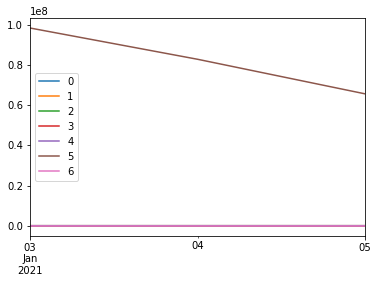

In [786]:
forecast_final.plot()

In [787]:
forecast_final

,0,1,2,3,4,5,6
2021-01-03,9217.907447,9149.170244,9000.222649,9092.617452,9193.518718,9.850303e+07,0.393024
2021-01-04,9175.847476,9172.622182,8991.090808,9072.712617,9231.112932,8.293728e+07,0.520235
2021-01-05,9198.287185,9192.866750,9043.350950,9155.148886,9341.963569,6.571906e+07,0.552899


In [788]:
days_3

,0,1,2,3,4,5,6
0,9217.907447,9149.170244,9000.222649,9092.617452,9193.518718,9.850303e+07,0.393024
1,9175.847476,9172.622182,8991.090808,9072.712617,9231.112932,8.293728e+07,0.520235
2,9198.287185,9192.866750,9043.350950,9155.148886,9341.963569,6.571906e+07,0.552899


In [789]:
forecast

array([[9.21790745e+03, 9.14917024e+03, 9.00022265e+03, 9.09261745e+03,
        9.19351872e+03, 9.85030281e+07, 3.93024355e-01],
       [9.17584748e+03, 9.17262218e+03, 8.99109081e+03, 9.07271262e+03,
        9.23111293e+03, 8.29372847e+07, 5.20235479e-01],
       [9.19828718e+03, 9.19286675e+03, 9.04335095e+03, 9.15514889e+03,
        9.34196357e+03, 6.57190602e+07, 5.52898884e-01]])